# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 2. Import Dataset
Dataset yang digunakan dalam portofolio kali ini adalah dataset Boston

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

# 3. Keterangan dari dataset Harga Rumah di Boston
- Crim : tingkat kejahatan per kapita berdasarkan kota boston
- Zn : proporsi tanah perumahan yang dengan kapasitas lebih dari 25.000 sq.ft.
- Indus : proporsi hektar bisnis non-ritel per kota
- Chas : Variabel dummy Sungai Charles (= 1 jika saluran membatasi sungai; 0 sebaliknya)
- Nox : konsentrasi oksida nitrat (per 10 juta)
- RM : rata-rata jumlah kamar per hunian
- AGE : proporsi unit bangunan yang ditempati dan dibangun sebelum tahun 1940
- DIS : jarak terhadap ke lima pusat pekerjaan di Kota Boston
- RAD : indeks akses ke ke jalan raya
- TAX : tarif pajak properti per $10,000

- PTRATIO : rasio murid-guru berdasarkan kota Boston
- B : Proporsi orang berkulit hitam di kota
- LStat : Persentase populasi yang lebih rendah
- MEDV : Nilai tengah rumah yang ditempati pemilik di kisaran $1000-an

- Source
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [5]:
for i in boston.keys():
    print(boston[i])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [6]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
df.shape

(506, 13)

In [9]:
df2 = pd.DataFrame(boston['target'])
df2.columns=['Price']
df2

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [10]:
df = pd.concat([df, df2], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# 4. Quick EDA
bertujuan untuk mengetahui kondisi dari dataset yang ada

In [11]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(data = bsDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'UniqueSample'
            ])

,Features,DataType,Null,NullPercentage,Unique,UniqueSample
0,CRIM,float64,0,0.0,504,"[0.12816, 0.34109]"
1,ZN,float64,0,0.0,26,"[17.5, 95.0]"
2,INDUS,float64,0,0.0,76,"[7.38, 1.47]"
3,CHAS,float64,0,0.0,2,"[1.0, 0.0]"
4,NOX,float64,0,0.0,81,"[0.389, 0.647]"
5,RM,float64,0,0.0,446,"[6.982, 5.155]"
6,AGE,float64,0,0.0,356,"[87.6, 42.4]"
7,DIS,float64,0,0.0,412,"[3.5549, 5.2146]"
8,RAD,float64,0,0.0,9,"[5.0, 2.0]"
9,TAX,float64,0,0.0,66,"[711.0, 293.0]"


In [12]:
df.duplicated().any()

False

# 5. Mengetahui distribusi data dari kolom target

<AxesSubplot:xlabel='Price', ylabel='Density'>

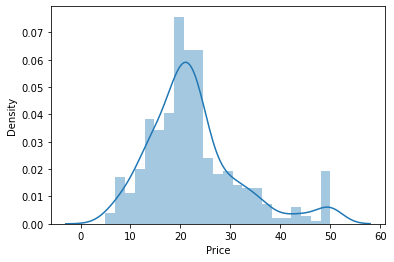

In [13]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price'>

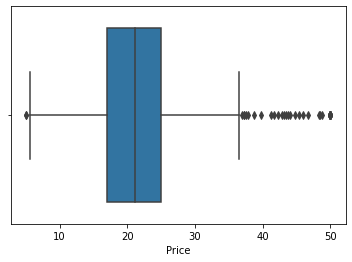

In [14]:
sns.boxplot(df['Price'])

# 6. Mengetahui korelasi dari kolom numerikal
Dikarenakan data tidak berdistribusi normal maka korelasi data dilakukan dengan metode spearman

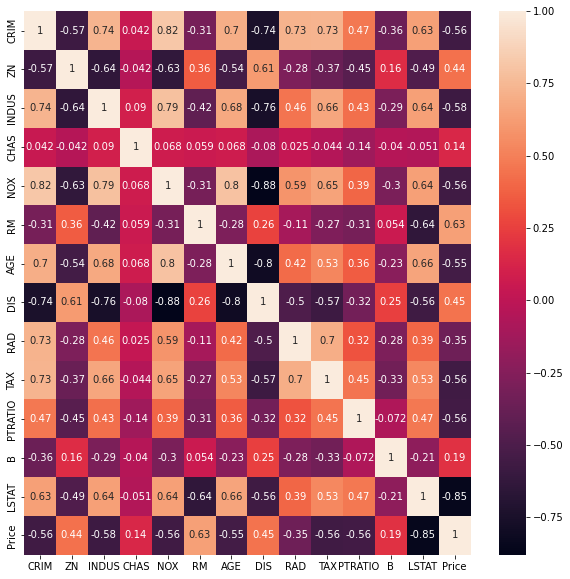

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr('spearman'), annot = True)
plt.show()

# 7. Feature Selection
- Menghapus kolom dengan korelasi dibawah 0.45 hingga -0.45

In [16]:
df.drop(columns=['CHAS', 'RAD', 'B'], inplace=True)

# 8. Splitting Dataset

In [17]:
x = df.drop(columns=['Price'], axis=1) # melakukan splitting data feature dan target
y = df['Price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.8, random_state= 2)

In [20]:
x_train.head() #data untuk latihan 

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
321,0.18159,0.0,7.38,0.493,6.376,54.3,4.5404,287.0,19.6,6.87
37,0.08014,0.0,5.96,0.499,5.850,41.5,3.9342,279.0,19.2,8.77
286,0.01965,80.0,1.76,0.385,6.230,31.5,9.0892,241.0,18.2,12.93
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03
25,0.84054,0.0,8.14,0.538,5.599,85.7,4.4546,307.0,21.0,16.51


In [21]:
x_test.head() # data untuk ujian

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
463,5.82115,0.0,18.10,0.713,6.513,89.9,2.8016,666.0,20.2,10.29
152,1.12658,0.0,19.58,0.871,5.012,88.0,1.6102,403.0,14.7,12.12
291,0.07886,80.0,4.95,0.411,7.148,27.7,5.1167,245.0,19.2,3.56
183,0.10008,0.0,2.46,0.488,6.563,95.6,2.8470,193.0,17.8,5.68
384,20.08490,0.0,18.10,0.700,4.368,91.2,1.4395,666.0,20.2,30.63


In [22]:
y_train.head() #kunci jawaban training

321    23.1
37     21.0
286    20.1
2      34.7
25     13.9
Name: Price, dtype: float64

In [23]:
y_test.head() #kunci jawaban ujian

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
Name: Price, dtype: float64

# 9. Melakukan machine Learning regresi linear

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
Model = LinearRegression(fit_intercept= True)

In [26]:
Model.fit(x_train, y_train) #mencari pattern dari data training

LinearRegression()

In [27]:
Model.predict(x_train) #melakukan latihan

array([25.13615002, 23.08047157, 20.29241941, 31.47633875, 14.79192302,
       15.05023835, 19.99033792, 15.64319572, 16.90945328, 18.60085131,
       14.97104327, 10.18225355, 33.69478437, 24.25575638, 31.46976757,
       17.52861565, 23.36931498, 25.33827329, 31.89542315, 20.95561404,
       31.84147668,  5.36968893, 37.42148722, 23.79015555, 19.51169073,
       23.93219606, 23.32819611, 24.97557874, 22.08455621, 33.55156977,
       26.86211072, 10.65779077, 17.81228787,  9.33336709, 18.48658785,
       11.40926905, 16.69506621, 27.84900253, 14.34012551, 17.05853041,
       25.033399  , 27.25638261, 16.94816099, 21.77497569, 15.65264116,
       11.95357756, 27.440621  , 18.91669828, 41.60271214, 17.63387137,
       20.51532775, 33.59766584, 21.58948953, 22.6356073 , 22.0009268 ,
       21.05786224, 23.01398573, 33.15293765, 24.0761909 , 32.31090275,
       21.95164131, 41.19861568, 12.44823767,  8.03414462, 25.78994318,
       15.94469553, 28.11889038, 18.07900987, 26.20279228, 38.56

In [28]:
Model.predict(x_test) #melakukan testing

array([21.54898023, 19.43312519, 33.54285237, 31.60313442,  2.06713078,
        3.78180022, 26.8442476 , 24.28798945, 18.87547954, 22.54741157,
       31.26115717, 26.02670439, 21.72319739, 18.96404102, 16.22991084,
       25.69246553, 20.03330808, 11.3374492 , 10.94060605, 17.05316522,
       21.29740914, 21.59855213, 36.57945984, 18.8866981 , 19.27662478,
       17.48699841, 38.57094541, 35.68439344, 29.94000665, 24.53053332,
       18.0739455 , 20.12007183, 32.46443533, 30.535089  , 11.76889678,
       19.25742131, 11.57313025, 19.06284611, 25.93632365, 24.00917626,
       28.29983952, 13.02108042, 32.28055487,  4.28802781, 21.69413359,
       18.92370233, 34.32579614, 17.50676255, 35.89023622,  2.36820657,
       32.32610686, 31.41505836,  4.8902626 , 33.6785358 , 19.56244626,
       20.57048138, 18.88064314, 19.25367256, 16.35225791, 19.45448   ,
       18.6928111 , 17.35865379, 18.52208623, 31.6702733 , 34.48511557,
       26.10192289, 40.97209481, 29.21438972, 12.53225295, 28.25

In [29]:
Model.coef_ #mengetahui koefisien dari masing masing kolom

array([-8.17203097e-02,  3.57031642e-02, -7.20133651e-02, -1.46766267e+01,
        3.82643935e+00,  1.23899085e-02, -1.43040407e+00,  1.13070165e-04,
       -9.31263017e-01, -6.02937827e-01])

In [30]:
Model.intercept_ #mengetahui intercept dari setiap 

36.70496942911353

In [31]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')

In [32]:
pd.DataFrame(Model.coef_, index=x_train.columns, columns=['koefisien']) #membuat dataframe dari koefisien

,koefisien
CRIM,-0.081720
ZN,0.035703
INDUS,-0.072013
NOX,-14.676627
RM,3.826439
AGE,0.012390
DIS,-1.430404
TAX,0.000113
PTRATIO,-0.931263
LSTAT,-0.602938


In [33]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,36.2


In [34]:
Model.predict([[0.02,18,2.31,0.5,6.5,60,4,295,15,5]]) #memprediksi data baru yang tidak ada di dalam dataset

array([32.78468303])

# 10. Memprediksi data baru yang tidak ada di dalam dataset dengan metode for loop dari regresi linear

In [35]:
coef = {}
for i in x.columns :
    val = input('Masukkan {} :'.format(i))
    coef[i] = val
df_coef = pd.DataFrame(pd.Series(coef), columns=['data']).T #data transpose alternative menggunakan .transpose()

pred = Model.predict(df_coef)
print('Harga Rumah dalam dollar: {}'.format(pred[0]))

Masukkan CRIM :5
Masukkan ZN :5
Masukkan INDUS :5
Masukkan NOX :5
Masukkan RM :5
Masukkan AGE :5
Masukkan DIS :5
Masukkan TAX :5
Masukkan PTRATIO :5
Masukkan LSTAT :5
Harga Rumah dalam dollar: -32.89662965889232


# 11. Evaluation Matrix

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
pred_train = Model.predict(x_train) #model memprediksi data training

In [38]:
r2_train = r2_score(y_train, pred_train)
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training')
print('='*50)
print('r2_train :', r2_train.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train:', mae_train.round(2))
print('mse_train:', mse_train.round(2))
print('rmse_train', rmse_train.round(2))

Evaluation Matrix untuk data training
r2_train : 0.7
mae_train: 3.54
mse_train: 25.66
rmse_train 5.07


In [39]:
pred_test = Model.predict(x_test) #model memprediksi data testing

In [40]:
r2_test = r2_score(y_test, pred_test)
mae_test = mean_absolute_error(y_test, pred_test)
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse_test) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training')
print('='*50)
print('r2_train :', r2_test.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train:', mae_test.round(2))
print('mse_train:', mse_test.round(2))
print('rmse_train', rmse_test.round(2))

Evaluation Matrix untuk data training
r2_train : 0.79
mae_train: 3.17
mse_train: 17.55
rmse_train 4.19


In [41]:
data = {
    "Training" : [r2_train, mae_train, mse_train, rmse_train],
    "Testing" : [r2_test, mae_test, mse_test, rmse_test]
}
pd.DataFrame(data, index= ['R2', 'MAE', 'MSE', 'RMSE']) #PEMBUATAN DATA FRAME UNTUK MEMBANDINGKAN EVAMATRIX TESTING DAN TRAINING

,Training,Testing
R2,0.696621,0.790209
MAE,3.538607,3.166289
MSE,25.656750,17.551025
RMSE,5.065249,4.189394


# 11. Improvement Machine Learning
- menggunakan feature engineering-polynomial feature

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
Poli = PolynomialFeatures(degree=2, include_bias=False, interaction_only = True)
# interaction_only = True ==> Interaction_only ==> Perkalian antar kolom

In [44]:
Poli = Poli.fit(x_train)

In [45]:
x_trainPoli = Poli.transform(x_train)
x_testPoli = Poli.transform(x_test)
df_xtrainPoli = pd.DataFrame(x_trainPoli)
df_xtestPoli = pd.DataFrame(x_testPoli)

In [46]:
Model.fit(df_xtrainPoli, y_train) # memodelkan training polynomial regression

LinearRegression()

In [47]:
PF_train = Model.predict(df_xtrainPoli) #model memprediksi data training dan testing dari ploynomial regresi
PF_test = Model.predict(df_xtestPoli)

In [48]:
r2_train_PF = r2_score(y_train, PF_train)
mae_train_PF = mean_absolute_error(y_train, PF_train)
mse_train_PF = mean_squared_error(y_train, PF_train)
rmse_train_PF = np.sqrt(mse_train_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training polinomial feature')
print('='*50)
print('r2_train_PF :', r2_train_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_PF:', mae_train_PF.round(2))
print('mse_train_PF:', mse_train_PF.round(2))
print('rmse_train_PF :', rmse_train_PF.round(2))

Evaluation Matrix untuk data training polinomial feature
r2_train_PF : 0.88
mae_train_PF: 2.32
mse_train_PF: 10.43
rmse_train_PF : 3.23


In [49]:
r2_test_PF = r2_score(y_test, PF_test) #r2 dari prediksi polynomial feature
mae_test_PF = mean_absolute_error(y_test, PF_test) #mae dari prediksi polynomial feature
mse_test_PF = mean_squared_error(y_test, PF_test) #mse dari prediksi polynomial feature
rmse_test_PF = np.sqrt(mse_test_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing polinomial feature')
print('='*50)
print('r2_test_PF :', r2_test_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_PF:', mae_test_PF.round(2))
print('mse_test_PF:', mse_test_PF.round(2))
print('rmse_test_PF :', rmse_test_PF.round(2))

Evaluation Matrix untuk data testing polinomial feature
r2_test_PF : 0.91
mae_test_PF: 2.19
mse_test_PF: 7.48
rmse_test_PF : 2.74


# 12. Evaluation Matrix Comparison
Berikut adalah perbandingan data evaluation matrix multiple regresi linier dan polinomial regresi

In [50]:
eva_data = {
    "LinReg Training" : [r2_train, mae_train, mse_train, rmse_train],
    "LinReg Testing" : [r2_test, mae_test, mse_test, rmse_test],
    'Polynomial Training' : [r2_train_PF, mae_train_PF, mse_train_PF, rmse_train_PF],
    'Polynomial Testing' : [r2_test_PF, mae_test_PF, mse_test_PF, rmse_test_PF]
}
pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,LinReg Training,LinReg Testing,Polynomial Training,Polynomial Testing
R2,0.696621,0.790209,0.876674,0.910537
MAE,3.538607,3.166289,2.319998,2.194025
MSE,25.656750,17.551025,10.429696,7.484438
RMSE,5.065249,4.189394,3.229504,2.735770


# 13. Mencoba regularization
Regularization digunakan untuk mendapatkan evaluation matrix terbaik

In [51]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [52]:
ridge = Ridge()
lasso = Lasso()
enet = ElasticNet()

ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
enet.fit(x_train, y_train)

R_train = ridge.predict(x_train)
L_train = lasso.predict(x_train)
E_train = enet.predict(x_train)

R_test = ridge.predict(x_test)
L_test = lasso.predict(x_test)
E_test = enet.predict(x_test)

In [53]:
r2_train_R = r2_score(y_train, R_train)
mae_train_R = mean_absolute_error(y_train, R_train)
mse_train_R = mean_squared_error(y_train, R_train)
rmse_train_R = np.sqrt(mse_train_R) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Ridge')
print('='*50)
print('r2_train_R :', r2_train_R.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_R:', mae_train_R.round(2))
print('mse_train_R:', mse_train_R.round(2))
print('rmse_train_R :', rmse_train_R.round(2))

Evaluation Matrix untuk data training Ridge
r2_train_R : 0.7
mae_train_R: 3.53
mse_train_R: 25.79
rmse_train_R : 5.08


In [54]:
r2_test_R = r2_score(y_test, R_test)
mae_test_R = mean_absolute_error(y_test, R_test)
mse_test_R = mean_squared_error(y_test, R_test)
rmse_test_R = np.sqrt(mse_test_R) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Ridge')
print('='*50)
print('r2_test_R :', r2_test_R.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_R:', mae_test_R.round(2))
print('mse_test_R:', mse_test_R.round(2))
print('rmse_test_R :', rmse_test_R.round(2))

Evaluation Matrix untuk data testing Ridge
r2_test_R : 0.79
mae_test_R: 3.2
mse_test_R: 17.92
rmse_test_R : 4.23


In [55]:
r2_train_L = r2_score(y_train, L_train)
mae_train_L = mean_absolute_error(y_train, L_train)
mse_train_L = mean_squared_error(y_train, L_train)
rmse_train_L = np.sqrt(mse_train_L) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Lasso')
print('='*50)
print('r2_train_L :', r2_train_L.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_L:', mae_train_L.round(2))
print('mse_train_L:', mse_train_L.round(2))
print('rmse_train_L :', rmse_train_L.round(2))

Evaluation Matrix untuk data training Lasso
r2_train_L : 0.65
mae_train_L: 3.83
mse_train_L: 29.75
rmse_train_L : 5.45


In [56]:
r2_test_L = r2_score(y_test, L_test)
mae_test_L = mean_absolute_error(y_test, L_test)
mse_test_L = mean_squared_error(y_test, L_test)
rmse_test_L = np.sqrt(mse_test_L) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing lasso')
print('='*50)
print('r2_test_L :', r2_test_L.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_L:', mae_test_L.round(2))
print('mse_test_L:', mse_test_L.round(2))
print('rmse_test_L :', rmse_test_L.round(2))

Evaluation Matrix untuk data testing lasso
r2_test_L : 0.73
mae_test_L: 3.56
mse_test_L: 22.82
rmse_test_L : 4.78


In [57]:
r2_train_E = r2_score(y_train, E_train)
mae_train_E = mean_absolute_error(y_train, E_train)
mse_train_E = mean_squared_error(y_train, E_train)
rmse_train_E = np.sqrt(mse_train_E) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Elastic Net')
print('='*50)
print('r2_train_E :', r2_train_E.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_E:', mae_train_E.round(2))
print('mse_train_E:', mse_train_E.round(2))
print('rmse_train_E :', rmse_train_E.round(2))

Evaluation Matrix untuk data training Elastic Net
r2_train_E : 0.65
mae_train_E: 3.82
mse_train_E: 29.52
rmse_train_E : 5.43


In [58]:
r2_test_E = r2_score(y_test, E_test)
mae_test_E = mean_absolute_error(y_test, E_test)
mse_test_E = mean_squared_error(y_test, E_test)
rmse_test_E = np.sqrt(mse_test_E) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Elastic Net')
print('='*50)
print('r2_test_E :', r2_test_E.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_E:', mae_test_E.round(2))
print('mse_test_E:', mse_test_E.round(2))
print('rmse_test_E :', rmse_test_E.round(2))

Evaluation Matrix untuk data testing Elastic Net
r2_test_E : 0.73
mae_test_E: 3.54
mse_test_E: 22.67
rmse_test_E : 4.76


# 14. Evaluation Matrix Comparison

In [59]:
eva_data = {
    "LinReg Training" : [r2_train, mae_train, mse_train, rmse_train],
    "LinReg Testing" : [r2_test, mae_test, mse_test, rmse_test],
    'Polynomial Training' : [r2_train_PF, mae_train_PF, mse_train_PF, rmse_train_PF],
    'Polynomial Testing' : [r2_test_PF, mae_test_PF, mse_test_PF, rmse_test_PF],
    'Ridge Training' : [r2_train_R, mae_train_R, mse_train_R, rmse_train_R],
    'Ridge Testing' : [r2_test_R, mae_test_R, mse_test_R, rmse_test_R],
    'Lasso Training' : [r2_train_L, mae_train_L, mse_train_L, rmse_train_L],
    'Lasso Testing' : [r2_test_L, mae_test_L, mse_test_L, rmse_test_L],
    'Elastic Net Training' : [r2_train_E, mae_train_E, mse_train_E, rmse_train_E],
    'Elastic Net Testing' : [r2_test_E, mae_test_E, mse_test_E, rmse_test_E]
}
pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,LinReg Training,LinReg Testing,Polynomial Training,Polynomial Testing,Ridge Training,Ridge Testing,Lasso Training,Lasso Testing,Elastic Net Training,Elastic Net Testing
R2,0.696621,0.790209,0.876674,0.910537,0.695062,0.785839,0.648262,0.727191,0.650989,0.729068
MAE,3.538607,3.166289,2.319998,2.194025,3.534199,3.201697,3.832946,3.561270,3.819275,3.537964
MSE,25.656750,17.551025,10.429696,7.484438,25.788542,17.916660,29.746413,22.823084,29.515821,22.666084
RMSE,5.065249,4.189394,3.229504,2.735770,5.078242,4.232808,5.454027,4.777351,5.432846,4.760891


# 15. Kesimpulan
Dikarenakan evaluation matrix terbaik yakni terletak di data polynomial testing, maka dilakukan penggabungan pengujian polynomial testing dengan regularization untuk mendapatkan Evaluation Matrix yang lebih baik lagi 

# 16. Polinomial Regression + Regularization

In [73]:
ridge.fit(df_xtrainPoli, y_train)## ridge
R_train_PF = ridge.predict(df_xtrainPoli)
R_test_PF = ridge.predict(df_xtestPoli)

lasso.fit(df_xtrainPoli, y_train)#lasso
L_train_PF = lasso.predict(df_xtrainPoli)
L_test_PF = lasso.predict(df_xtestPoli)

enet.fit(df_xtrainPoli, y_train) #elasticnet
E_train_PF = enet.predict(df_xtrainPoli)
E_test_PF = enet.predict(df_xtestPoli)

In [74]:
r2_train_R_PF = r2_score(y_train, R_train_PF)
mae_train_R_PF = mean_absolute_error(y_train, R_train_PF)
mse_train_R_PF = mean_squared_error(y_train, R_train_PF)
rmse_train_R_PF = np.sqrt(mse_train_R_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Ridge+Polinomial')
print('='*50)
print('r2_train_R_PF :', r2_train_R_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_R_PF:', mae_train_R_PF.round(2))
print('mse_train_R_PF:', mse_train_R_PF.round(2))
print('rmse_train_R_PF :', rmse_train_R_PF.round(2))

Evaluation Matrix untuk data training Ridge+Polinomial
r2_train_R_PF : 0.87
mae_train_R_PF: 2.36
mse_train_R_PF: 10.79
rmse_train_R_PF : 3.28


In [75]:
r2_test_R_PF = r2_score(y_test, R_test_PF)
mae_test_R_PF = mean_absolute_error(y_test, R_test_PF)
mse_test_R_PF = mean_squared_error(y_test, R_test_PF)
rmse_test_R_PF = np.sqrt(mse_test_R_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Ridge+Polinomial')
print('='*50)
print('r2_test_R_PF :', r2_test_R_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_R_PF:', mae_test_R_PF.round(2))
print('mse_test_R_PF:', mse_test_R_PF.round(2))
print('rmse_test_R_PF :', rmse_test_R_PF.round(2))

Evaluation Matrix untuk data testing Ridge+Polinomial
r2_test_R_PF : 0.91
mae_test_R_PF: 2.18
mse_test_R_PF: 7.86
rmse_test_R_PF : 2.8


In [76]:
r2_train_L_PF = r2_score(y_train, L_train_PF)
mae_train_L_PF = mean_absolute_error(y_train, L_train_PF)
mse_train_L_PF = mean_squared_error(y_train, L_train_PF)
rmse_train_L_PF = np.sqrt(mse_train_L_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Lasso+Polinomial')
print('='*50)
print('r2_train_L_PF :', r2_train_L_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_L_PF:', mae_train_L_PF.round(2))
print('mse_train_L_PF:', mse_train_L_PF.round(2))
print('rmse_train_L_PF :', rmse_train_L_PF.round(2))

Evaluation Matrix untuk data training Lasso+Polinomial
r2_train_L_PF : 0.81
mae_train_L_PF: 2.88
mse_train_L_PF: 15.69
rmse_train_L_PF : 3.96


In [77]:
r2_test_L_PF = r2_score(y_test, L_test_PF)
mae_test_L_PF = mean_absolute_error(y_test, L_test_PF)
mse_test_L_PF = mean_squared_error(y_test, L_test_PF)
rmse_test_L_PF = np.sqrt(mse_test_L_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Lasso+Polinomial')
print('='*50)
print('r2_test_L_PF :', r2_test_L_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_L_PF:', mae_test_L_PF.round(2))
print('mse_test_L_PF:', mse_test_L_PF.round(2))
print('rmse_test_L_PF :', rmse_test_L_PF.round(2))

Evaluation Matrix untuk data testing Lasso+Polinomial
r2_test_L_PF : 0.83
mae_test_L_PF: 2.86
mse_test_L_PF: 14.58
rmse_test_L_PF : 3.82


In [78]:
r2_train_E_PF = r2_score(y_train, E_train_PF)
mae_train_E_PF = mean_absolute_error(y_train, E_train_PF)
mse_train_E_PF = mean_squared_error(y_train, E_train_PF)
rmse_train_E_PF = np.sqrt(mse_train_E_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Elastic Net+Polinomial')
print('='*50)
print('r2_train_E_PF :', r2_train_E_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_E_PF:', mae_train_E_PF.round(2))
print('mse_train_E_PF:', mse_train_E_PF.round(2))
print('rmse_train_E_PF :', rmse_train_E_PF.round(2))

Evaluation Matrix untuk data training Elastic Net+Polinomial
r2_train_E_PF : 0.82
mae_train_E_PF: 2.84
mse_train_E_PF: 15.23
rmse_train_E_PF : 3.9


In [79]:
r2_test_E_PF = r2_score(y_test, E_test_PF)
mae_test_E_PF = mean_absolute_error(y_test, E_test_PF)
mse_test_E_PF = mean_squared_error(y_test, E_test_PF)
rmse_test_E_PF = np.sqrt(mse_test_E_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Elastic Net +Polinomial')
print('='*50)
print('r2_test_E_PF :', r2_test_E_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_E_PF:', mae_test_E_PF.round(2))
print('mse_test_E_PF:', mse_test_E_PF.round(2))
print('rmse_test_E_PF :', rmse_test_E_PF.round(2))

Evaluation Matrix untuk data testing Elastic Net +Polinomial
r2_test_E_PF : 0.83
mae_test_E_PF: 2.85
mse_test_E_PF: 14.0
rmse_test_E_PF : 3.74


# 17. Evaluation Matrix Comparison

In [80]:
eva_data = {
    "LinReg Training" : [r2_train, mae_train, mse_train, rmse_train],
    "LinReg Testing" : [r2_test, mae_test, mse_test, rmse_test],
    'Polynomial Training' : [r2_train_PF, mae_train_PF, mse_train_PF, rmse_train_PF],
    'Polynomial Testing' : [r2_test_PF, mae_test_PF, mse_test_PF, rmse_test_PF],
    'Ridge Training' : [r2_train_R, mae_train_R, mse_train_R, rmse_train_R],
    'Ridge Testing' : [r2_test_R, mae_test_R, mse_test_R, rmse_test_R],
    'Lasso Training' : [r2_train_L, mae_train_L, mse_train_L, rmse_train_L],
    'Lasso Testing' : [r2_test_L, mae_test_L, mse_test_L, rmse_test_L],
    'Elastic Net Training' : [r2_train_E, mae_train_E, mse_train_E, rmse_train_E],
    'Elastic Net Testing' : [r2_test_E, mae_test_E, mse_test_E, rmse_test_E],
    'Ridge+Polinomial Training' : [r2_train_R_PF, mae_train_R_PF, mse_train_R_PF, rmse_train_R_PF],
    'Ridge+Polinomial Testing' : [r2_test_R_PF, mae_test_R_PF, mse_test_R_PF, rmse_test_R_PF],
    'Lasso+Polinomial Training' : [r2_train_L_PF, mae_train_L_PF, mse_train_L_PF, rmse_train_L_PF],
    'Lasso+Polinomial Testing' : [r2_test_L_PF, mae_test_L_PF, mse_test_L_PF, rmse_test_L_PF],
    'Elastic+ Polinomial Training' : [r2_train_E_PF, mae_train_E_PF, mse_train_E_PF, rmse_train_E_PF],
    'Elastic+Polinomial Testing' : [r2_test_E_PF, mae_test_E_PF, mse_test_E_PF, rmse_test_E_PF]
}
pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,LinReg Training,LinReg Testing,Polynomial Training,Polynomial Testing,Ridge Training,Ridge Testing,Lasso Training,Lasso Testing,Elastic Net Training,Elastic Net Testing,Ridge+Polinomial Training,Ridge+Polinomial Testing,Lasso+Polinomial Training,Lasso+Polinomial Testing,Elastic+ Polinomial Training,Elastic+Polinomial Testing
R2,0.696621,0.790209,0.876674,0.910537,0.695062,0.785839,0.648262,0.727191,0.650989,0.729068,0.872466,0.906097,0.814517,0.825705,0.819950,0.832671
MAE,3.538607,3.166289,2.319998,2.194025,3.534199,3.201697,3.832946,3.561270,3.819275,3.537964,2.364669,2.176542,2.875386,2.856979,2.841993,2.853404
MSE,25.656750,17.551025,10.429696,7.484438,25.788542,17.916660,29.746413,22.823084,29.515821,22.666084,10.785515,7.855863,15.686294,14.581452,15.226820,13.998689
RMSE,5.065249,4.189394,3.229504,2.735770,5.078242,4.232808,5.454027,4.777351,5.432846,4.760891,3.284131,2.802831,3.960593,3.818567,3.902156,3.741482


# 18. Kesimpulan terakhir
Dikarenakan data hasil evaluation matrix terbaik menunjukkan bahwa algoritma terbaik dari data Boston House Price adalah data polinomial, maka dilakukan masukkan data baru untuk memprediksi harga rumah di Boston dengan algoritma tersebut

# 19. Memasukkan data baru

In [86]:
data = {
    'CRIM' : 0.1,
    'ZN' : 10,
    'INDUS' : 7,
    'NOX' : 0.5,
    'RM' : 7,
    'AGE' : 78,
    'DIS' : 6,
    'TAX' : 299,
    'PTRATIO' : 17,
    'LSTAT' : 6
}
data111 = pd.DataFrame(data, index =['1'])

In [87]:
data111

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
1,0.1,10,7,0.5,7,78,6,299,17,6


In [94]:
poli1= Poli.fit(data111)
poli2 = Poli.transform(data111)
poli2_df=pd.DataFrame(poli2)
prediction = Model.predict(poli2_df)
prediction

array([27.15029738])

In [96]:
prediction[0] #harga rumah dalam dollar

27.150297376634185